In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [26]:
import io

In [32]:
# 보험계약정보
df= pd.read_csv("SDB4_I_CT_CONT_PVT.csv", encoding ='UTF8')
df_copy = df.copy()

In [33]:
# 보험담보정보
mf = pd.read_csv("SDB4_I_CT_MGG_PVT.csv", encoding ='UTF8')
mf_copy = mf.copy()

In [39]:
# 차주정보
pf = pd.read_csv("SDB4_A_ID.csv", encoding ='UTF8')
pf_copy = pf.copy()
pf_copy

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
0,169568,1,2010,2,1
1,1076771,1,1942,1,1
2,233370,1,1997,2,1
3,945944,1,1998,2,1
4,210996,1,1986,2,1
...,...,...,...,...,...
49129,90161,1,1962,1,1
49130,1858480,1,1992,1,1
49131,622364,1,1994,1,1
49132,924265,1,2010,1,1


In [44]:
# 보험관계자정보
dd = pd.read_csv("SDB4_I_CT_RLPS.csv", encoding = 'UTF8') 
dd = dd[dd['CT_RLPS_GBN_CD']=='I']
dd_copy = dd.copy()
dd_copy

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
0,1167730,1,6,1678831,0,2422587,I,99,1,31
1,1207761,1,6,6455722,0,8639765,I,1,1,99
2,1190281,1,6,7123339,0,1055736,I,1,1,31
3,304661,1,6,3939575,0,3371309,I,99,1,99
4,775678,1,6,4642981,0,6262129,I,1,1,99
...,...,...,...,...,...,...,...,...,...,...
377853,493285,1,6,1628862,0,3589187,I,99,1,34
377854,154888,1,6,2887858,0,7854733,I,1,1,99
377855,972308,1,6,7244812,0,7924234,I,2,1,31
377856,864415,1,6,3816916,0,8101729,I,1,1,99


In [45]:
# 차주의 사람 기준으로 보험관계자 정보를 묶기
# 증권번호 기준(POL_SN)으로 보험 계약과 담보를 merge 

# 차주에서 필요한것 : [차주넘버 생년월일, 성별, 증권번호] 
a1 = pd.merge(
    pf_copy, dd_copy, on = 'JOIN_SN', how ='left')

,JOIN_SN,JOIN_SN_TYP_x,BTH_YR,GENDER,IS_KRN,JOIN_SN_TYP_y,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
0,169568,1,2010,2,1,1.0,6.0,3427879.0,0.0,9877311.0,I,99.0,1.0,99.0
1,1076771,1,1942,1,1,1.0,6.0,2482634.0,0.0,4880355.0,I,1.0,1.0,99.0
2,233370,1,1997,2,1,1.0,8.0,6900284.0,0.0,659924.0,I,99.0,1.0,33.0
3,233370,1,1997,2,1,1.0,8.0,6900284.0,0.0,344059.0,I,99.0,1.0,33.0
4,233370,1,1997,2,1,1.0,8.0,6900284.0,0.0,506645.0,I,99.0,1.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231258,1858480,1,1992,1,1,1.0,6.0,2499640.0,0.0,9437102.0,I,3.0,1.0,99.0
231259,622364,1,1994,1,1,1.0,6.0,4323335.0,0.0,3559911.0,I,99.0,1.0,26.0
231260,924265,1,2010,1,1,1.0,6.0,2070324.0,0.0,8047398.0,I,3.0,1.0,25.0
231261,924265,1,2010,1,1,1.0,6.0,8408375.0,0.0,4539644.0,I,99.0,1.0,25.0


In [48]:
# 특정성별
a2 = pd.merge(
    a1, df_copy, on = 'POL_SN', how ='left')


In [49]:
# 특정성별 / 나이 / 담보 
# 관계자 + 계약 + 담보 
a3 = pd.merge(
    a2, mf_copy, on = 'POL_SN', how = 'left')
a3

,JOIN_SN_x,JOIN_SN_TYP_x,BTH_YR,GENDER,IS_KRN,JOIN_SN_TYP_y,SCTR_CD_x,COM_SN,IS_ME,POL_SN,...,YM_201909_y,YM_201910_y,YM_201911_y,YM_201912_y,YM_202001_y,YM_202002_y,YM_202003_y,YM_202004_y,YM_202005_y,YM_202006_y
0,169568,1,2010,2,1,1.0,6.0,3427879.0,0.0,9877311.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,169568,1,2010,2,1,1.0,6.0,3427879.0,0.0,9877311.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1076771,1,1942,1,1,1.0,6.0,2482634.0,0.0,4880355.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,233370,1,1997,2,1,1.0,8.0,6900284.0,0.0,659924.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,233370,1,1997,2,1,1.0,8.0,6900284.0,0.0,344059.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501468,1350315,1,1940,1,1,1.0,6.0,159399.0,0.0,5890808.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4501469,1350315,1,1940,1,1,1.0,6.0,159399.0,0.0,5890808.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4501470,1350315,1,1940,1,1,1.0,6.0,159399.0,0.0,5890808.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4501471,1350315,1,1940,1,1,1.0,6.0,159399.0,0.0,5890808.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
"""
1. 담보(코드, 그룹코드) 구성

2. 납입주기코드 먼저 봐서 연납.월납.일시납 중 뭐가 많은지

3. 가장 많은 거 빼고 나머지 레코드 다 지우고.

4. 가장 많이 선택된 납입코드의 납입주기는 어떤 비율인지.

5. 종기월 - 시기월 => 보장기간의 비율을 어떠한지

6. 차주정보-관계자정보-보험계약정보 조인 join()해서 연령.성별에 따른 납입주기-보험기간-납입보험료-담보 비율들을 살펴보기.
"""
df.CT_PY_CYCLE_CD.unique()  #담보정보업권코드의 유니크 값 
df_group = df.groupby("CT_PY_CYCLE_CD").count()
# 01:일시납, 02:매월납, 03:년납, 99:기타

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,...,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
CT_PY_CYCLE_CD,,,,,,,,,,,,,,,,,,,,,
1,88156,88156,88156,88156,88156,88156,88156,88156,88156,88156,...,88156,88156,88156,88156,88156,88156,88156,88156,88156,88156
2,267746,267746,267746,267746,267746,267746,267746,267746,267746,267746,...,267746,267746,267746,267746,267746,267746,267746,267746,267746,267746
3,12384,12384,12384,12384,12384,12384,12384,12384,12384,12384,...,12384,12384,12384,12384,12384,12384,12384,12384,12384,12384
99,553,553,553,553,553,553,553,553,553,553,...,553,553,553,553,553,553,553,553,553,553


In [ ]:
"""
4. 가장 많이 선택된 납입코드의 납입주기는 어떤 비율인지.
5. 종기월 - 시기월 => 보장기간의 비율을 어떠한지
6. 차주정보-관계자정보-보험계약정보 조인 join()해서 연령.성별에 따른 납입주기-보험기간-납입보험료-담보 비율들을 살펴보기.
"""



([<matplotlib.patches.Wedge at 0x1b34e09d220>,
 [Text(-0.7167960691770291, 0.8343880363550044, '2'),
  Text(-0.050412244920145156, -1.098844213508954, '3'),
  Text(0.7970994257316574, -0.7580451869765168, '1'),
  Text(1.0999877984109296, -0.005181056559811196, '99')])

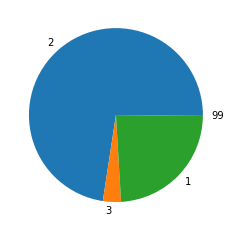

In [31]:
CT_PY_CYCLE_CD_arr = []
labels=[]
for i in df.CT_PY_CYCLE_CD.unique():
    CT_PY_CYCLE_CD_arr.append(df_group["POL_SN"][i])
    labels.append(i)
plt.pie(CT_PY_CYCLE_CD_arr, labels=labels)
# 02:매월납 > 01:일시납, > 03:연납 > 99:기타

In [14]:
df = df[['SCTR_CD', 'POL_SN', 'IS_GRP_INS']]  # 업권코드, 증권번호, 단체보험여부
df.drop_duplicates()                          #중복값 삭제                            
df =  df[df.IS_GRP_INS == 0]                  # 단체보험인 경우 삭제 


# 보험계약(증권번호, 보험종류코드), 보험담보(증권번호, 보험담보그룹코드, 보험담보), 증권번호로 묶고, 보험담보 있는 쪽만 
df_merge = pd.merge(
df_copy[['POL_SN','INS_GBN_CD']], mf_copy[['POL_SN','MGG_GRP_CD', 'MGG_CD']], how='right', on='POL_SN')
df_merge 
# 증권번호, 보험종류코드, 보험담보그룹코드, 보험담보

,POL_SN,INS_GBN_CD,MGG_GRP_CD,MGG_CD
0,5418925,1.0,A1,A1300
1,5918673,4.0,A6,A6999
2,7181175,1.0,A4,A4210
3,103303,13.0,A6,A6999
4,4395281,7.0,A3,A3400
...,...,...,...,...
2900212,9975108,3.0,A5,A5200
2900213,9975108,3.0,A5,A5200
2900214,9975108,3.0,A5,A5200
2900215,8530080,1.0,A4,A4104
